In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from scipy.stats import norm
x1 = norm.rvs(size=100,loc=0,scale=3)
x2 = norm.rvs(size=50,loc=8,scale=1)

In [11]:
x = np.r_[x1, x2]


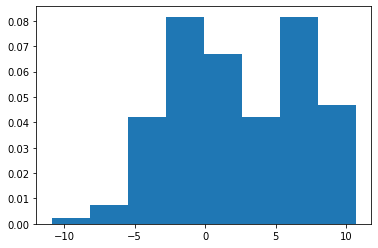

In [12]:
plt.hist(x,bins=8,density=True)
plt.show()

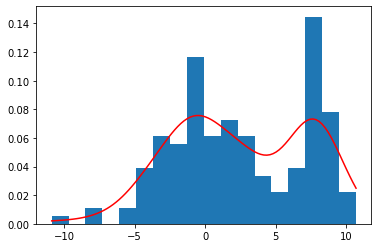

In [15]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), "r-")
plt.show()

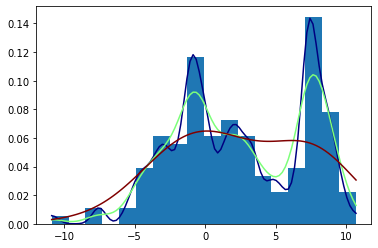

In [16]:
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,3)))
for bandwidth in [0.1, 0.2, 0.6]:
    density = kde.gaussian_kde(x,bandwidth) # Estimate the densities
    plt.plot(xgrid, density(xgrid),color=next(colors), label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

In [17]:
from statsmodels.nonparametric.kde import kernel_switch
list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

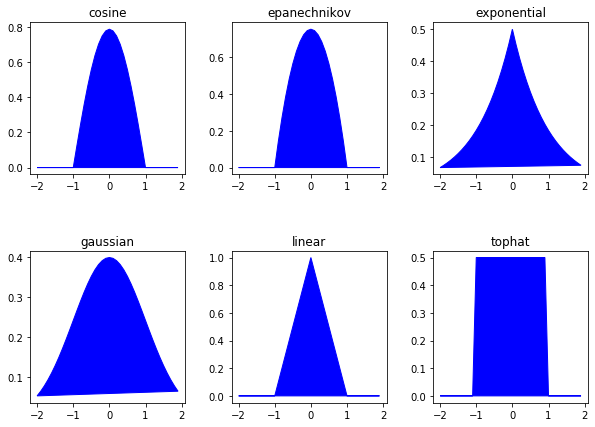

In [18]:
from sklearn.neighbors import KernelDensity

# Plot all available kernels

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

plt_ind = np.arange(6) + 231

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(kernel=k)
    kde_model.fit([[0]]) # Build a model using a sample of only one value, for example, 0.
    score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None]) # estimate the density of all points around zero
    plt.subplot(ind)
    plt.fill(np.arange(-2, 2, 0.1)[:, None], np.exp(score), c='blue') #plot the density along the y-axis
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

In [19]:
  x = np.array([2,3,5,6,5,2,4,2,3,4])
  print(x.mean())  

3.6


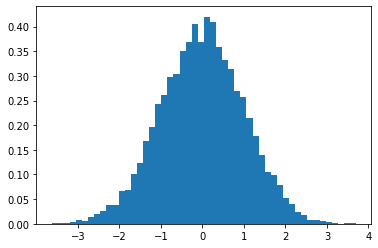

In [20]:
x = np.random.normal(loc=0.0,scale=1.0,size=10000)
a = plt.hist(x,50,density="True")

In [22]:
print("the empirical mean of the sample es", x.mean())

the empirical mean of the sample es -0.0037753039974486014


In [23]:
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/NTests)

MSE:  1.0540526359084178e-05


In [24]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)

X = [5, -1, 3.3, 2.7, 12.2]
Y=[10,12,8,9,11]

print("Cov(X, X) = %.2f" % Cov(X, X))
print("Var(X) = %.2f" % np.var(X))

print( "Cov(X, Y) = %.2f" % Cov(X, Y))

Cov(X, X) = 18.89
Var(X) = 18.89
Cov(X, Y) = 0.18


In [25]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 1.00000
Corr(X, Y) = -0.61234


In [26]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    return Corr(list2rank(X), list2rank(Y))

X = [1, 2, 3, 4, 100]
Y = [5, -100, 7, 10, 9]

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))

ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.27
Spearman rank coefficient: 0.80
